In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder

# Data Preperation

In [3]:
data_train = pd.read_csv('Dataset/UNSW-NB15/UNSW_NB15_training-set.csv')
data_test = pd.read_csv('Dataset/UNSW-NB15/UNSW_NB15_testing-set.csv')

In [4]:
data_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [6]:
print("Size: " + str(data_train.size))
print("Shape: " + str(data_train.shape))
print("-----------------------")
print(data_train.value_counts('attack_cat'))
print("-----------------------")
print(data_train.value_counts('label'))

Size: 3704940
Shape: (82332, 45)
-----------------------
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64
-----------------------
label
1    45332
0    37000
Name: count, dtype: int64


In [7]:
data_train.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [8]:
data_train.duplicated().sum()

0

Text(0.5, 1.0, 'Label Distribution')

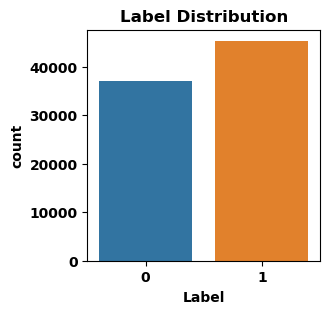

In [9]:
#Label
plt.figure(figsize=(3, 3))
sns.countplot(data=data_train, x="label")
plt.xlabel("Label")
plt.title("Label Distribution")

Text(0.5, 1.0, 'Attack Category Distribution')

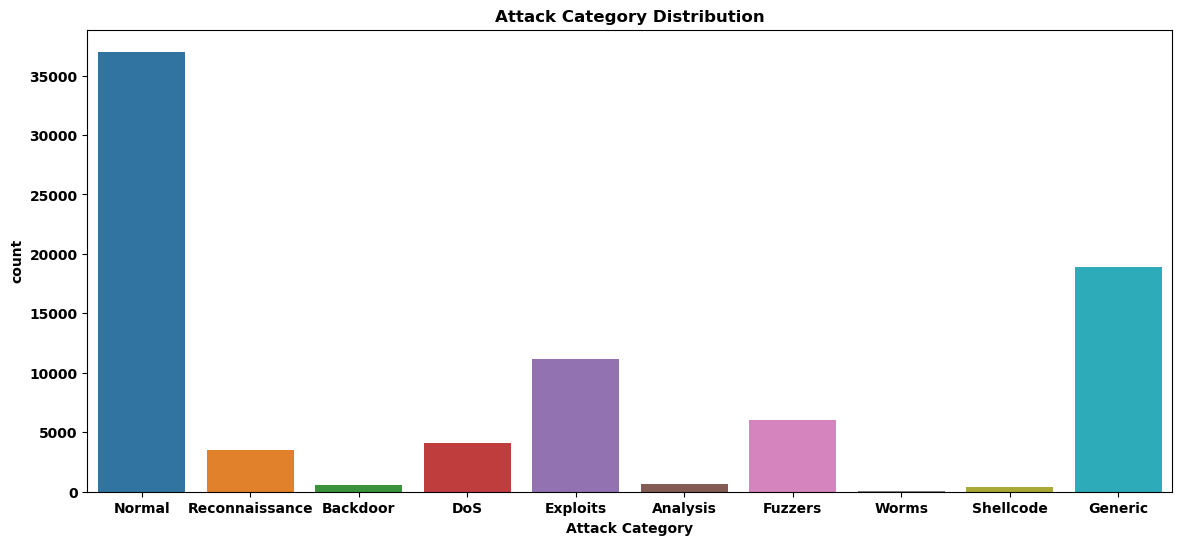

In [10]:
#Attack Category
plt.figure(figsize=(14, 6))
sns.countplot(data=data_train, x="attack_cat")
plt.xlabel("Attack Category")
plt.title("Attack Category Distribution")

In [11]:
#All_feature
all_feature = data_train.columns
all_feature

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [84]:
#Split Attack and Normal from dataframe
data_attack = data_train[data_train['label'] == 1]

#Optional
#data_normal = data_train[data_train['label'] == 0]

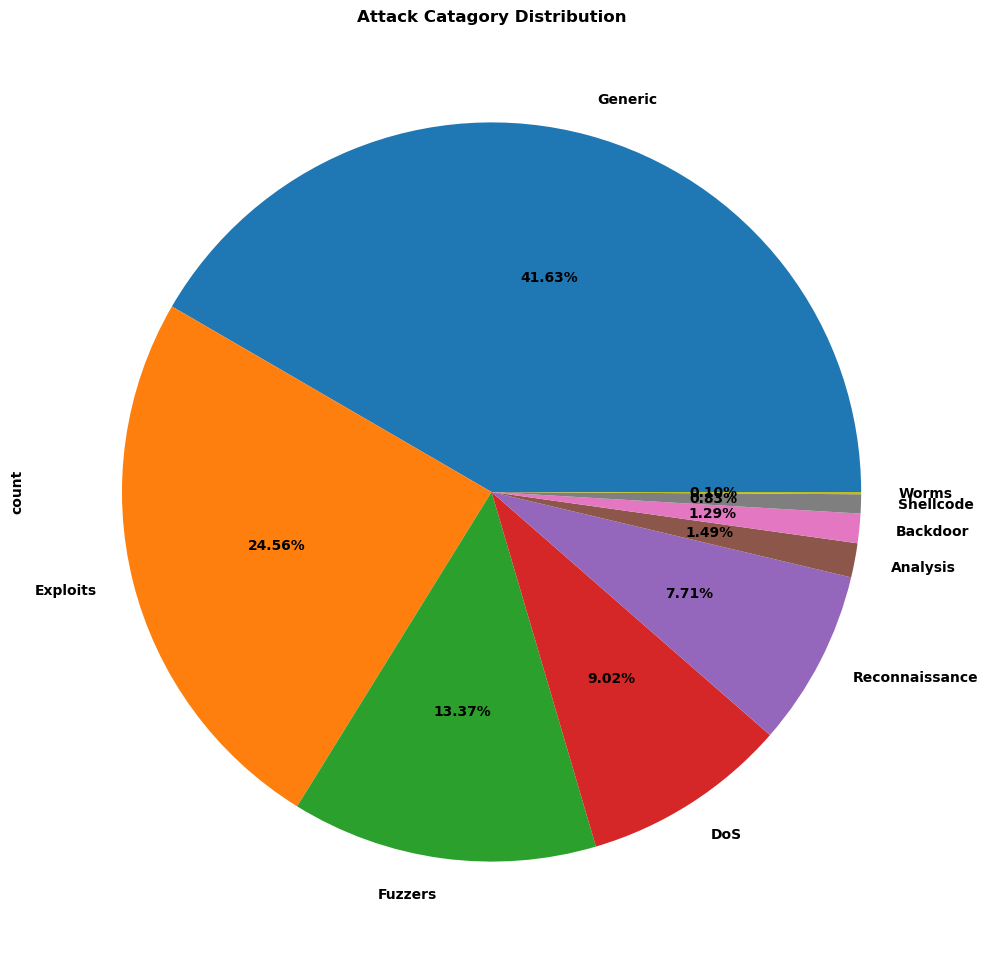

In [13]:
#Attack Category Distribution
plt.figure(figsize=(12, 12))
data_attack['attack_cat'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Attack Catagory Distribution")
plt.show()

Text(0.5, 1.0, 'Attack Category Distribution')

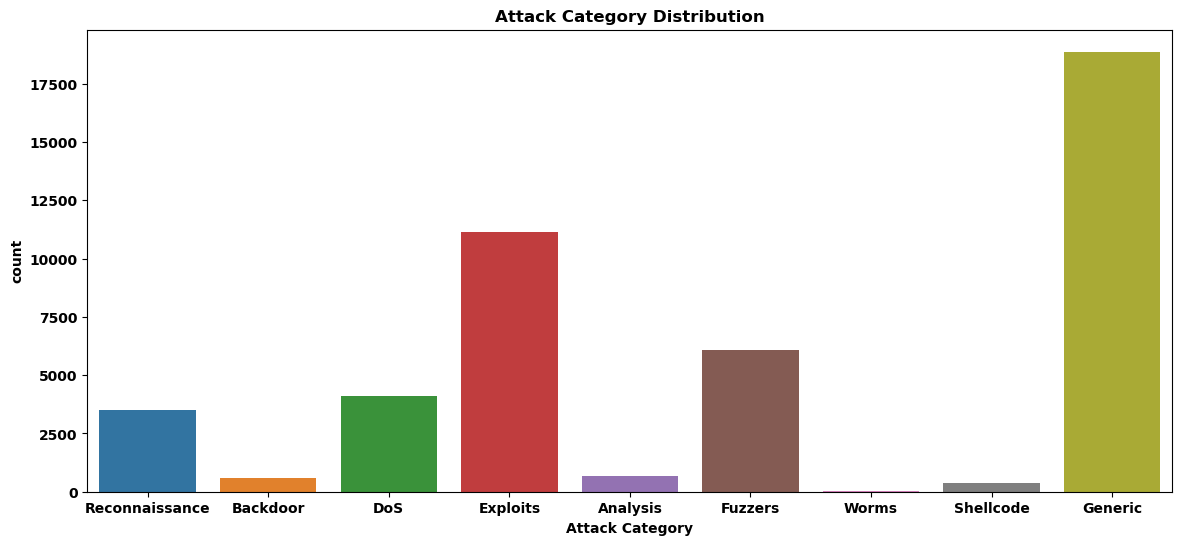

In [14]:
#Attack Category
plt.figure(figsize=(14, 6))
sns.countplot(data=data_attack, x="attack_cat")
plt.xlabel("Attack Category")
plt.title("Attack Category Distribution")

Encode attack_cat attribute

In [88]:
#Encode attack_cat:
le = LabelEncoder()
data_attack['attack_cat'] = le.fit_transform(data_attack['attack_cat'])
data_attack['attack_cat'] = data_attack['attack_cat'].astype('int64')

C:\Users\Acer\AppData\Local\Temp\ipykernel_15856\509035496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_attack['attack_cat'] = le.fit_transform(data_attack['attack_cat'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_15856\509035496.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_attack['attack_cat'] = data_attack['attack_cat'].astype('int64')


In [89]:
#Save the attack_cat classes, so we can use it for reverse back to original
attack_cat = list(le.classes_)
attack_cat

['Analysis',
 'Backdoor',
 'DoS',
 'Exploits',
 'Fuzzers',
 'Generic',
 'Reconnaissance',
 'Shellcode',
 'Worms']

In [ ]:
#Inverse to original
list(attack_cat)
data_attack['attack_cat'] = list(le.inverse_transform(data_attack['attack_cat']))

Encode state attribute

In [90]:
#Encode state:
le = LabelEncoder()
data_attack['state'] = le.fit_transform(data_attack['state'])
data_attack['state'] = data_attack['state'].astype('int64')

C:\Users\Acer\AppData\Local\Temp\ipykernel_15856\3789899120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_attack['state'] = le.fit_transform(data_attack['state'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_15856\3789899120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_attack['state'] = data_attack['state'].astype('int64')


In [91]:
#Save the state classes, so we can use it for reverse back to original
state = list(le.classes_)
state

['ACC', 'CLO', 'CON', 'FIN', 'INT', 'REQ']

In [ ]:
#Inverse to original
list(state)
data_attack['state'] = list(le.inverse_transform(data_attack['state']))

Encode service attribute

In [92]:
#Encode service:
le = LabelEncoder()
data_attack['service'] = le.fit_transform(data_attack['service'])
data_attack['service'] = data_attack['service'].astype('int64')

C:\Users\Acer\AppData\Local\Temp\ipykernel_15856\512092484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_attack['service'] = le.fit_transform(data_attack['service'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_15856\512092484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_attack['service'] = data_attack['service'].astype('int64')


In [93]:
#Save the service classes, so we can use it for reverse back to original
service = list(le.classes_)
service

['-',
 'dhcp',
 'dns',
 'ftp',
 'ftp-data',
 'http',
 'irc',
 'pop3',
 'radius',
 'smtp',
 'snmp',
 'ssh',
 'ssl']

In [ ]:
#Inverse to original
list(service)
data_attack['service'] = list(le.inverse_transform(data_attack['service']))

Encode proto attribute

In [94]:
#Encode proto:
le = LabelEncoder()
data_attack['proto'] = le.fit_transform(data_attack['proto'])
data_attack['proto'] = data_attack['proto'].astype('int64')

C:\Users\Acer\AppData\Local\Temp\ipykernel_15856\860848974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_attack['proto'] = le.fit_transform(data_attack['proto'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_15856\860848974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_attack['proto'] = data_attack['proto'].astype('int64')


In [95]:
#Save the proto classes, so we can use it for reverse back to original
proto = list(le.classes_)
proto

['3pc',
 'a/n',
 'aes-sp3-d',
 'any',
 'argus',
 'aris',
 'ax.25',
 'bbn-rcc',
 'bna',
 'br-sat-mon',
 'cbt',
 'cftp',
 'chaos',
 'compaq-peer',
 'cphb',
 'cpnx',
 'crtp',
 'crudp',
 'dcn',
 'ddp',
 'ddx',
 'dgp',
 'egp',
 'eigrp',
 'emcon',
 'encap',
 'etherip',
 'fc',
 'fire',
 'ggp',
 'gmtp',
 'gre',
 'hmp',
 'i-nlsp',
 'iatp',
 'ib',
 'idpr',
 'idpr-cmtp',
 'idrp',
 'ifmp',
 'igp',
 'il',
 'ip',
 'ipcomp',
 'ipcv',
 'ipip',
 'iplt',
 'ipnip',
 'ippc',
 'ipv6',
 'ipv6-frag',
 'ipv6-no',
 'ipv6-opts',
 'ipv6-route',
 'ipx-n-ip',
 'irtp',
 'isis',
 'iso-ip',
 'iso-tp4',
 'kryptolan',
 'l2tp',
 'larp',
 'leaf-1',
 'leaf-2',
 'merit-inp',
 'mfe-nsp',
 'mhrp',
 'micp',
 'mobile',
 'mtp',
 'mux',
 'narp',
 'netblt',
 'nsfnet-igp',
 'nvp',
 'ospf',
 'pgm',
 'pim',
 'pipe',
 'pnni',
 'pri-enc',
 'prm',
 'ptp',
 'pup',
 'pvp',
 'qnx',
 'rdp',
 'rsvp',
 'rvd',
 'sat-expak',
 'sat-mon',
 'sccopmce',
 'scps',
 'sctp',
 'sdrp',
 'secure-vmtp',
 'sep',
 'skip',
 'sm',
 'smp',
 'snp',
 'sprite-rpc

In [ ]:
#Inverse to original
list(proto)
data_attack['proto'] = list(le.inverse_transform(data_attack['proto']))

Text(0.5, 1.0, 'Attack Category Distribution')

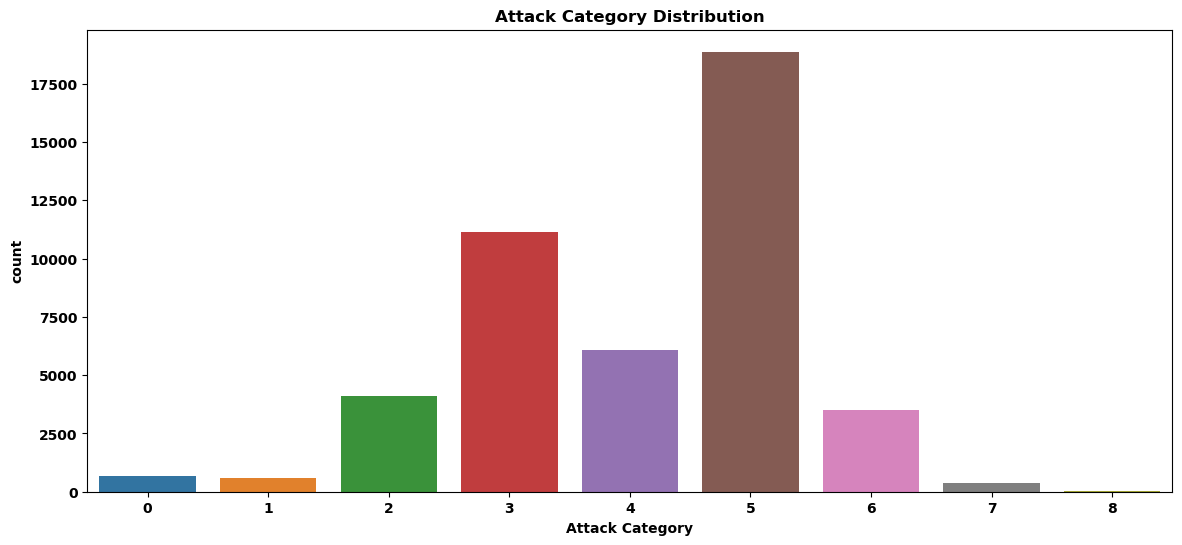

In [96]:
#After Attack Category Encoding
plt.figure(figsize=(14, 6))
sns.countplot(data=data_attack, x="attack_cat")
plt.xlabel("Attack Category")
plt.title("Attack Category Distribution")

In [97]:
data_attack.dtypes

id                     int64
dur                  float64
proto                  int64
service                int64
state                  int64
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [98]:
pd.set_option('display.max_rows', 150)
print(data_attack.value_counts('proto'))
print("-----------------------")
print(data_attack.value_counts('service'))
print("-----------------------")
print(data_attack.value_counts('state'))

proto
115    21321
109    15247
116     3515
75       638
93       324
3         96
31        88
87        64
49        61
96        58
106       54
107       52
77        52
68        52
126       34
62        34
81        34
7         34
125       33
40        33
86        33
58        33
104       33
42        33
55        33
32        33
47        33
29        33
74        33
63        33
112       33
24        33
113       33
22        33
83        33
4         33
18        33
70        33
12        33
72        33
10        33
79        32
91        32
78        32
90        32
80        32
89        32
88        32
92        32
82        32
85        32
84        32
0         32
94        32
114       32
127       32
124       32
123       32
122       32
121       32
120       32
119       32
118       32
117       32
111       32
95        32
110       32
108       32
105       32
103       32
101       32
100       32
99        32
98        32
97        32
102       32
64    

In [101]:
#Feature Selection
feature = data_attack.drop(['id', 'is_sm_ips_ports'], axis=1)
feature.dtypes

dur                  float64
proto                  int64
service                int64
state                  int64
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_l

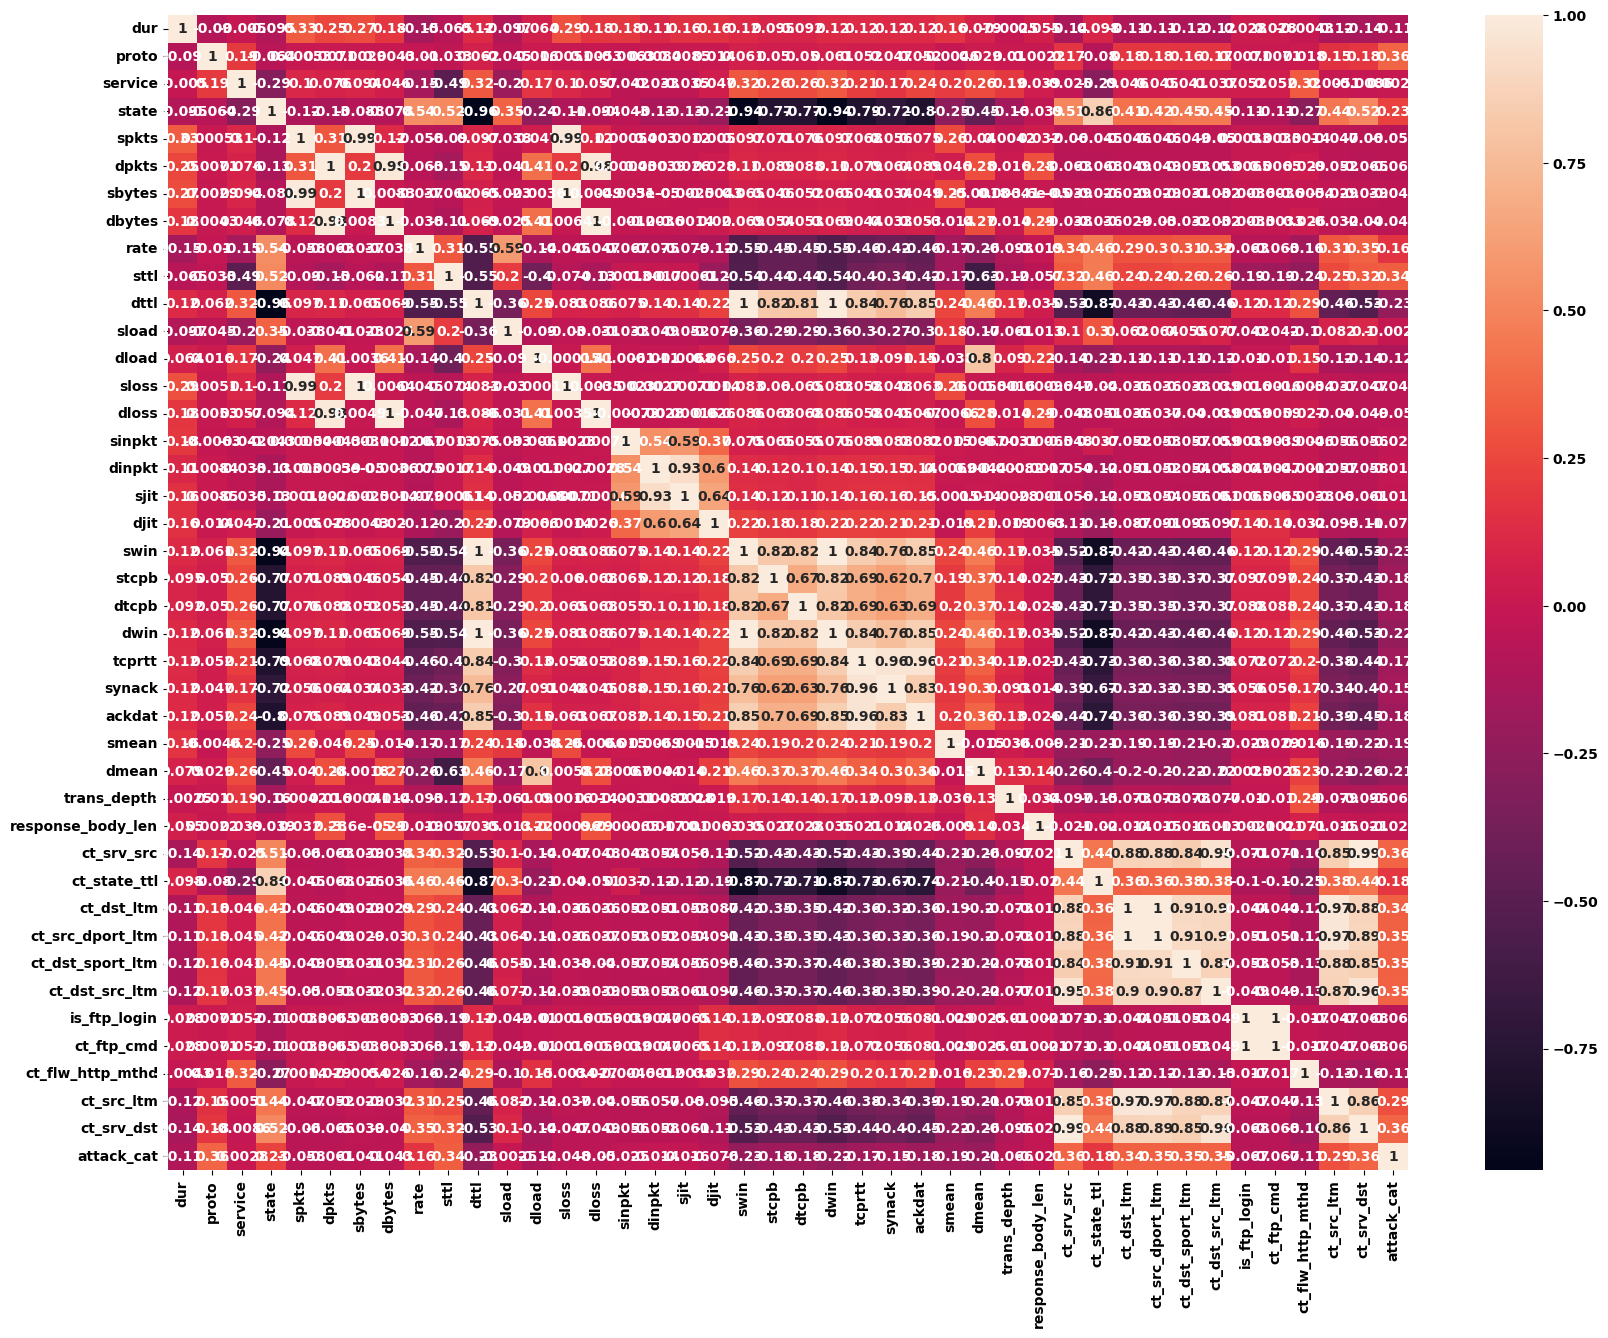

In [102]:
#Correlation between feature
#%matplotlib inline
plt.figure(figsize=[20,15])
sns.heatmap(feature.corr(),annot=True)
plt.show()